In [ ]:
#this is from : https://github.com/khanhnamle1994/fashion-mnist/blob/master/CNN-1Conv.ipynb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
time_arr = []

In [ ]:
# Import libraries
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#binarize label because our label is nominal
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()

# Load training and test data from csv
train_set = pd.read_csv('Dataset/sign_mnist_train.csv')
test_set = pd.read_csv('Dataset/sign_mnist_test.csv')

# X is training images, and y is training labels
X = np.array(train_set.iloc[:, 1:])
y = label_binrizer.fit_transform(np.array(train_set.iloc[:, 0]))

# Split original training data into sub-training (70%) and validation data (30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(test_set.iloc[:, 1:])
y_test = label_binrizer.fit_transform(np.array(test_set.iloc[:, 0]))

In [ ]:
#make label as unique value
unique_train_val = np.array(y)
np.unique(unique_train_val)

In [ ]:
#let see image before it is normalized
plt.imshow(X_train[0].reshape(28,28))

In [ ]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [ ]:
#let see image after it is normalized
plt.imshow(X_train[0].reshape(28,28))

In [8]:
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [9]:
# Single Layer CNN
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(24, activation='softmax'))

cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
cnn1.summary()

In [10]:
start_time = time.time()
history1 = cnn1.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

print("--- %s seconds ---" % (time.time() - start_time))
time_arr.append(time.time() - start_time)

Instructions for updating:
Use tf.cast instead.
Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 9s 443us/step - loss: 2.4268 - acc: 0.3626 - val_loss: 1.4973 - val_acc: 0.6343
Epoch 2/10
19218/19218 [==============================] - 8s 424us/step - loss: 1.1133 - acc: 0.7099 - val_loss: 0.7854 - val_acc: 0.8028
Epoch 3/10
19218/19218 [==============================] - 8s 423us/step - loss: 0.6376 - acc: 0.8428 - val_loss: 0.4908 - val_acc: 0.8818
Epoch 4/10
19218/19218 [==============================] - 8s 427us/step - loss: 0.4042 - acc: 0.9116 - val_loss: 0.3289 - val_acc: 0.9366
Epoch 5/10
19218/19218 [==============================] - 9s 482us/step - loss: 0.2680 - acc: 0.9487 - val_loss: 0.2071 - val_acc: 0.9655
Epoch 6/10
19218/19218 [==============================] - 10s 528us/step - loss: 0.1849 - acc: 0.9700 - val_loss: 0.1393 - val_acc: 0.9831
Epoch 7/10
19218/19218 [==============================] - 8s 403us/step - 

In [11]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.5852553726314701
Test accuracy: 0.8377021751254881


In [12]:
# 3 Layer CNN
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(24, activation='softmax'))

cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
cnn3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [14]:
start_time = time.time()
history2 = cnn3.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))
print("--- %s seconds ---" % (time.time() - start_time))
time_arr.append(time.time() - start_time)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 14s 704us/step - loss: 3.0308 - acc: 0.0949 - val_loss: 2.3095 - val_acc: 0.3342
Epoch 2/10
19218/19218 [==============================] - 13s 696us/step - loss: 1.8627 - acc: 0.4084 - val_loss: 1.0427 - val_acc: 0.7100
Epoch 3/10
19218/19218 [==============================] - 13s 681us/step - loss: 1.0642 - acc: 0.6462 - val_loss: 0.5523 - val_acc: 0.8536
Epoch 4/10
19218/19218 [==============================] - 13s 684us/step - loss: 0.6989 - acc: 0.7633 - val_loss: 0.2959 - val_acc: 0.9272
Epoch 5/10
19218/19218 [==============================] - 13s 684us/step - loss: 0.4972 - acc: 0.8303 - val_loss: 0.1794 - val_acc: 0.9631
Epoch 6/10
19218/19218 [==============================] - 13s 692us/step - loss: 0.3679 - acc: 0.8736 - val_loss: 0.1217 - val_acc: 0.9739
Epoch 7/10
19218/19218 [==============================] - 13s 681us/step - loss: 0.2992 - acc: 0.8986 - val_loss: 0.0

In [15]:
score2 = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.16934845983001418
Test accuracy: 0.954824316787507


In [16]:
# 4 Layer CNN
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
#cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
#cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
#cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(24, activation='softmax'))

cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [17]:
cnn4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [18]:
start_time = time.time()
history3 = cnn4.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

print("--- %s seconds ---" % (time.time() - start_time))
time_arr.append(time.time() - start_time)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 36s 2ms/step - loss: 2.9418 - acc: 0.1125 - val_loss: 1.9589 - val_acc: 0.3955
Epoch 2/10
19218/19218 [==============================] - 35s 2ms/step - loss: 1.5175 - acc: 0.5106 - val_loss: 0.5657 - val_acc: 0.8431
Epoch 3/10
19218/19218 [==============================] - 35s 2ms/step - loss: 0.7146 - acc: 0.7520 - val_loss: 0.2018 - val_acc: 0.9485
Epoch 4/10
19218/19218 [==============================] - 36s 2ms/step - loss: 0.3928 - acc: 0.8629 - val_loss: 0.0553 - val_acc: 0.9924
Epoch 5/10
19218/19218 [==============================] - 35s 2ms/step - loss: 0.2301 - acc: 0.9232 - val_loss: 0.0266 - val_acc: 0.9947
Epoch 6/10
19218/19218 [==============================] - 36s 2ms/step - loss: 0.1683 - acc: 0.9423 - val_loss: 0.0100 - val_acc: 0.9995
Epoch 7/10
19218/19218 [==============================] - 35s 2ms/step - loss: 0.1124 - acc: 0.9634 - val_loss: 0.0050 - val_acc:

In [19]:
score3 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.14766053988847155
Test accuracy: 0.9592861126603458


In [20]:
# 5 Layer CNN working
cnn5 = Sequential()
cnn5.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

cnn5.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
#cnn4.add(BatchNormalization())

cnn5.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
#cnn4.add(BatchNormalization())
cnn5.add(MaxPooling2D(pool_size=(2, 2)))
cnn5.add(Dropout(0.25))

cnn5.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#cnn4.add(BatchNormalization())
cnn5.add(Dropout(0.25))

cnn5.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#cnn4.add(BatchNormalization())
cnn5.add(MaxPooling2D(pool_size=(2, 2)))
cnn5.add(Dropout(0.25))

cnn5.add(Flatten())

cnn5.add(Dense(512, activation='relu'))
#cnn4.add(BatchNormalization())
cnn5.add(Dropout(0.5))

cnn5.add(Dense(128, activation='relu'))
#cnn4.add(BatchNormalization())
cnn5.add(Dropout(0.5))

cnn5.add(Dense(24, activation='softmax'))

cnn5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
cnn5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 9, 9, 64)          0         
__________

In [22]:
start_time = time.time()
history4 = cnn5.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))
print("--- %s seconds ---" % (time.time() - start_time))
time_arr.append(time.time() - start_time)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 38s 2ms/step - loss: 3.0717 - acc: 0.0760 - val_loss: 2.3374 - val_acc: 0.2780
Epoch 2/10
19218/19218 [==============================] - 41s 2ms/step - loss: 1.8236 - acc: 0.4001 - val_loss: 0.7229 - val_acc: 0.7807
Epoch 3/10
19218/19218 [==============================] - 41s 2ms/step - loss: 0.8890 - acc: 0.6994 - val_loss: 0.3359 - val_acc: 0.8878
Epoch 4/10
19218/19218 [==============================] - 38s 2ms/step - loss: 0.5142 - acc: 0.8203 - val_loss: 0.1721 - val_acc: 0.9520
Epoch 5/10
19218/19218 [==============================] - 37s 2ms/step - loss: 0.3374 - acc: 0.8845 - val_loss: 0.0613 - val_acc: 0.9853
Epoch 6/10
19218/19218 [==============================] - 37s 2ms/step - loss: 0.2306 - acc: 0.9232 - val_loss: 0.0449 - val_acc: 0.9896
Epoch 7/10
19218/19218 [==============================] - 39s 2ms/step - loss: 0.1694 - acc: 0.9430 - val_loss: 0.0304 - val_acc:

In [23]:
score4 = cnn5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.19024539503455207
Test accuracy: 0.9530117122141663


In [24]:
# 6 Layer CNN
cnn6 = Sequential()
cnn6.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#cnn5.add(MaxPooling2D(pool_size=(2, 2)))
#cnn5.add(Dropout(0.25))

cnn6.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))

cnn6.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
#cnn4.add(BatchNormalization())
#cnn5.add(MaxPooling2D(pool_size=(2, 2)))
#cnn5.add(Dropout(0.25))

cnn6.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
#cnn4.add(BatchNormalization())
cnn6.add(MaxPooling2D(pool_size=(2, 2)))
cnn6.add(Dropout(0.25))

cnn6.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#cnn4.add(BatchNormalization())
cnn6.add(Dropout(0.25))

cnn6.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#cnn4.add(BatchNormalization())
cnn6.add(MaxPooling2D(pool_size=(2, 2)))
cnn6.add(Dropout(0.25))

cnn6.add(Flatten())

cnn6.add(Dense(512, activation='relu'))
#cnn4.add(BatchNormalization())
cnn6.add(Dropout(0.5))

cnn6.add(Dense(128, activation='relu'))
#cnn4.add(BatchNormalization())
cnn6.add(Dropout(0.5))

cnn6.add(Dense(24, activation='softmax'))

cnn6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [25]:
cnn6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)          18496     
__________

In [26]:
start_time = time.time()
history5 = cnn6.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))
print("--- %s seconds ---" % (time.time() - start_time))
time_arr.append(time.time() - start_time)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 38s 2ms/step - loss: 2.9823 - acc: 0.1001 - val_loss: 2.2221 - val_acc: 0.3190
Epoch 2/10
19218/19218 [==============================] - 37s 2ms/step - loss: 1.8150 - acc: 0.4131 - val_loss: 0.8796 - val_acc: 0.7232
Epoch 3/10
19218/19218 [==============================] - 37s 2ms/step - loss: 0.9345 - acc: 0.6831 - val_loss: 0.3589 - val_acc: 0.8916
Epoch 4/10
19218/19218 [==============================] - 38s 2ms/step - loss: 0.5413 - acc: 0.8093 - val_loss: 0.1340 - val_acc: 0.9659
Epoch 5/10
19218/19218 [==============================] - 37s 2ms/step - loss: 0.3648 - acc: 0.8766 - val_loss: 0.0744 - val_acc: 0.9870
Epoch 6/10
19218/19218 [==============================] - 37s 2ms/step - loss: 0.2339 - acc: 0.9224 - val_loss: 0.0253 - val_acc: 0.9983
Epoch 7/10
19218/19218 [==============================] - 37s 2ms/step - loss: 0.1800 - acc: 0.9400 - val_loss: 0.0175 - val_acc:

In [27]:
score5 = cnn6.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Test loss: 0.2012669712952268
Test accuracy: 0.9408812046848857


In [28]:
import matplotlib.pyplot as plt

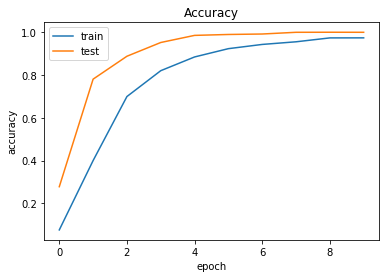

In [29]:
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [30]:
array_score = []
array_loss = []
array_time = []

In [31]:
array_score.append(score1[1])
array_score.append(score2[1])
array_score.append(score3[1])
array_score.append(score4[1])
array_score.append(score5[1])

In [32]:
array_loss.append(score1[0])
array_loss.append(score2[0])
array_loss.append(score3[0])
array_loss.append(score4[0])
array_loss.append(score5[0])

In [33]:
array_time.append(time_arr[0])
array_time.append(time_arr[1])
array_time.append(time_arr[2])
array_time.append(time_arr[3])
array_time.append(time_arr[4])

In [34]:
inc_arr = []

In [35]:
inc_arr.append(1)
inc_arr.append(2)
inc_arr.append(3)
inc_arr.append(4)

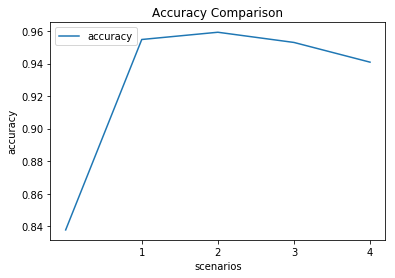

In [36]:
plt.plot(array_score)
#plt.plot(array_loss)
plt.title("Accuracy Comparison")
plt.xticks(inc_arr)
plt.xlabel('scenarios')
plt.ylabel('accuracy')
plt.legend(['accuracy'])#,'loss'])
plt.show()

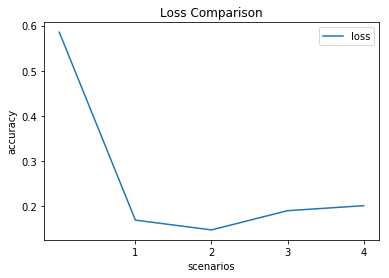

In [37]:
#plt.plot(array_score)dasdasd
plt.plot(array_loss)
plt.title("Loss Comparison")
plt.xticks(inc_arr)
plt.xlabel('scenarios')
plt.ylabel('accuracy')
plt.legend(['loss'])#,'loss'])
plt.show()

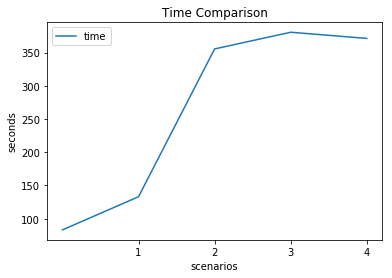

In [38]:
#plt.plot(array_score)
plt.plot(array_time)
plt.title("Time Comparison")
plt.xticks(inc_arr)
plt.xlabel('scenarios')
plt.ylabel('seconds')
plt.legend(['time'])#,'loss'])
plt.show()

In [39]:
time_arr

[83.05527353286743,
 133.02156853675842,
 355.5864610671997,
 380.7076518535614,
 371.43728041648865]

In [40]:
array_score

[0.8377021751254881,
 0.954824316787507,
 0.9592861126603458,
 0.9530117122141663,
 0.9408812046848857]

In [41]:
array_loss

[0.5852553726314701,
 0.16934845983001418,
 0.14766053988847155,
 0.19024539503455207,
 0.2012669712952268]